## Testing plotting storm tracks ##

In [1]:
# Load local modules
import os
import sys
import glob

# Third-party modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import iris

# Other imports
from tqdm import tqdm

In [2]:
# File path
# File path
file_path = "/home/users/benhutch/energy-sotcr-2024-2025/storm_tracks/Storm_Eoywn_Track"

# Read file, using regex to split on either whitespace or ampersand with optional spaces
df = pd.read_csv(
    file_path,
    sep=r'\s+|&',         # Split on any whitespace or '&'
    engine='python',      # Required for regex in `sep`
    header=None,
    names=[
        "time", "lon", "lat", "max_wind",
        "motion_dir", "motion_speed", "pressure"
    ]
)

# drop the columns containing only NaN values
df = df.dropna(axis=1, how='all')


In [3]:
# reset the indec
df.reset_index(inplace=True)

In [4]:
df.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,lon,motion_dir
0,2025012312,332.597748,47.255039,9.899187,NaN,NaN,333.1569,NaN,48.49336,967.3890
1,2025012318,340.470642,49.495193,11.052280,NaN,NaN,339.9089,NaN,51.10016,949.1087
2,2025012400,347.387695,52.259689,11.739490,NaN,NaN,345.6694,NaN,52.69522,941.6809
3,2025012406,352.283875,55.258995,11.461090,NaN,NaN,350.7384,NaN,55.44136,940.8001
4,2025012412,354.816650,58.025589,10.976090,NaN,NaN,355.5616,NaN,57.62955,948.0689


In [5]:
# rename level_0 to time
df.rename(columns={'level_0': 'time'}, inplace=True)

# rename level_1 to centre_lon
df.rename(columns={'level_1': 'centre_lon'}, inplace=True)
# rename level_2 to centre_lat
df.rename(columns={'level_2': 'centre_lat'}, inplace=True)

# rename level_3 to max_10m_wind_speed
df.rename(columns={'level_3': 'max_10m_wind_speed'}, inplace=True)

# drop level 4 and level 5
df.drop(columns=['level_4', 'level_5'], inplace=True)

# rename level 6 to direction
df.rename(columns={'level_6': 'direction'}, inplace=True)

# drop level 7
df.drop(columns=['level_7'], inplace=True)

# rename level 8 to speed
df.rename(columns={'lon': 'speed'}, inplace=True)

# rename level 9 to pressure
df.rename(columns={'motion_dir': 'pressure'}, inplace=True)


In [6]:
df.head()

,time,centre_lon,centre_lat,max_10m_wind_speed,direction,speed,pressure
0,2025012312,332.597748,47.255039,9.899187,333.1569,48.49336,967.3890
1,2025012318,340.470642,49.495193,11.052280,339.9089,51.10016,949.1087
2,2025012400,347.387695,52.259689,11.739490,345.6694,52.69522,941.6809
3,2025012406,352.283875,55.258995,11.461090,350.7384,55.44136,940.8001
4,2025012412,354.816650,58.025589,10.976090,355.5616,57.62955,948.0689


In [7]:
# format time as a datetime object with the format YYYY-MM-DD HH:MM:SS
# when current time is in the format YYYYMMDDHH
df['time'] = pd.to_datetime(df['time'], format='%Y%m%d%H')

# Set this as the index
df.set_index('time', inplace=True)

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)
  0%|          | 0/38 [00:00<?, ?it/s]/tmp/ipykernel_2877218/2095209735.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['centre_lon'][i],
/tmp/ipykernel_2877218/2095209735.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['centre_lat'][i],
/tmp/ipykernel_2877218/2095209735.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be trea

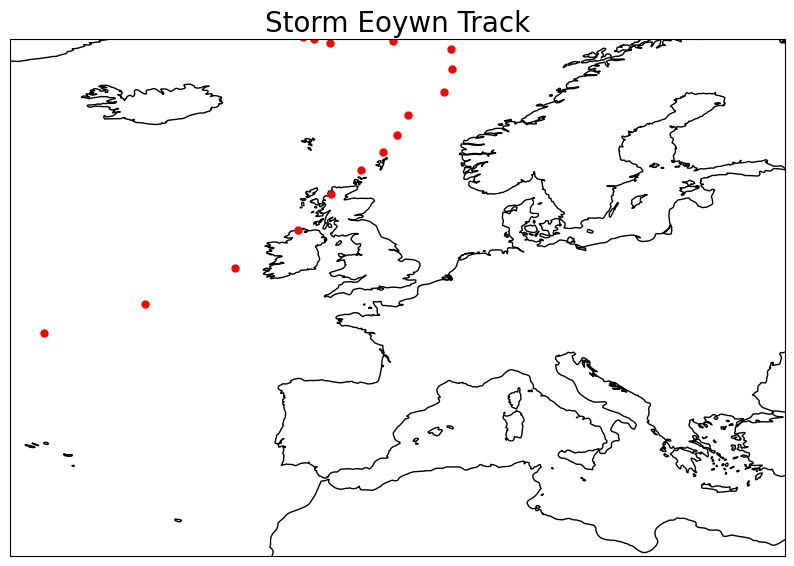

In [8]:
import cartopy.crs as ccrs

# Use iris to plot the storm tracks
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# INclude coastal boundaries
ax.coastlines()

# Plot the storm tracks
for i in tqdm(range(len(df))):
    ax.plot(
        df['centre_lon'][i],
        df['centre_lat'][i],
        marker='o',
        color='red',
        markersize=5,
        transform=ccrs.PlateCarree()
    )

# Set the title
ax.set_title('Storm Eoywn Track', fontsize=20)

# limit to north western europe region
ax.set_extent([-30, 30, 30, 70], crs=ccrs.PlateCarree())